In [1]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from matplotlib import pyplot as plt
from sklearn import metrics

In [2]:
# read the data
preprocessed_data = pd.read_pickle('../data/preprocessed_twitter_Monika.pd')

# Create a dataframe
df = pd.DataFrame(preprocessed_data)
y = df['score'].copy()
df.drop('score', axis=1, inplace=True) 

In [3]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

In [4]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

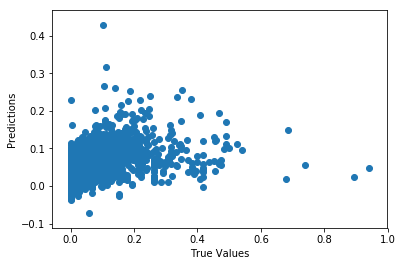

[ -6.71860510e-05  -1.33321082e-02   2.82926963e+00  -7.44158701e-04
   1.69309080e-04  -5.45709322e-01   4.07523464e-01   2.91666857e+01
   1.13372721e+00  -5.06664524e-04   2.05830008e-04   1.79001017e-04
  -1.30019335e-05   1.14332271e-01  -4.92160789e-02  -6.40040577e-02
   9.54115685e-02  -6.11078736e+00  -4.24546460e+00   3.26754636e-01
  -1.80920954e-01  -4.38834907e+01   4.12093252e+01   1.91582117e-07
   2.25290565e-03  -2.37017646e-05   3.50386481e-04  -1.03902135e-05
   2.55308444e-05  -3.74484036e-06   2.23986531e-05]


In [5]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print(lm.coef_)

In [6]:
scores = cross_val_score(model, df, y, cv=4)
print("Cross-validated scores:", scores)

Cross-validated scores: [ 0.22660861  0.26079244  0.24499237  0.18015667]


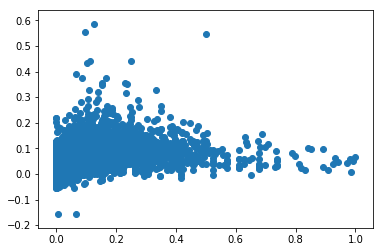

In [7]:
predictions = cross_val_predict(model, df, y, cv=4)
plt.scatter(y, predictions)
plt.show()

In [8]:
accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.221724739607


In [9]:
print(lm.coef_)

[ -6.71860510e-05  -1.33321082e-02   2.82926963e+00  -7.44158701e-04
   1.69309080e-04  -5.45709322e-01   4.07523464e-01   2.91666857e+01
   1.13372721e+00  -5.06664524e-04   2.05830008e-04   1.79001017e-04
  -1.30019335e-05   1.14332271e-01  -4.92160789e-02  -6.40040577e-02
   9.54115685e-02  -6.11078736e+00  -4.24546460e+00   3.26754636e-01
  -1.80920954e-01  -4.38834907e+01   4.12093252e+01   1.91582117e-07
   2.25290565e-03  -2.37017646e-05   3.50386481e-04  -1.03902135e-05
   2.55308444e-05  -3.74484036e-06   2.23986531e-05]
